In [1]:
%cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
#!pwd
import numpy as np
from matplotlib import pyplot as plt
from SYK_fft import *
import sys
from scipy import optimize
from scipy.linalg import norm
import scipy.linalg as LA

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


In [2]:
Nbig = int(2**18)
err = 1e-5

beta = 100.
mu = 0.001
J = 1.

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

In [3]:
def fixed_point_egraal(T, x0, err, phi=1.5, output=False):
    """
    Golden Ratio Algorithm for the problem x = T(x)

    T is the operator
    x0 is the starting point

    """
    
    JF = lambda x: LA.norm(x)
    
    x, x_ = x0.copy(), x0.copy()
    tau = 1. / phi + 1. / phi**2

    F = lambda x: x - T(x)
    la = 1
    step_list = [la]
    th = 1
    Fx = F(x0)
    values = [JF(Fx)]
    res = 1.

    while res > err:
        x1 = x_ - la * Fx
        Fx1 = F(x1)

        n1 = LA.norm(x1 - x)**2
        n2 = LA.norm(Fx1 - Fx)**2
        la1 = min(tau * la, 0.25 * phi * th / la * (n1 / n2))
        x_ = ((phi - 1) * x1 + x_) / phi
        th = phi * la1 / la
        x, la, Fx = x1, la1, Fx1
        res = JF(Fx)
        values.append(res)
        step_list.append(la1)

    return values, x, step_list

In [4]:
#Gtau = -0.5*np.ones(Nbig) 
#Gtau = 1/(4*np.pi*J**2) * (np.pi/(beta*np.sin(np.pi*tau/beta)))**0.5
#init_Gomega = Time2FreqF(Gtau,Nbig,beta)
#init_Gomega = Time2FreqF(Gtau,Nbig,beta)
init_Gomega = 1./(1j*omega + mu)
#Gtau = Freq2TimeF(1/(1j*omega + mu),Nbig,beta)
''' It's crucial to start with this, even changing the sign here is enough to make the solution 
fall into an unwanted one'''

itern = 0
diff = 1.
x = 0.2

def fun(Gomega):
    Gtau = Freq2TimeF(Gomega,Nbig,beta)
    Sigmatau = J**2 * Gtau**2 * Gtau[::-1]
    Sigmaomega = Time2FreqF(Sigmatau,Nbig,beta)
    return(Gomega - 1./(1j*omega + mu - Sigmaomega))

def rmsnorm(vec):
    N = len(vec)
    return np.sqrt((1./N) * np.sum(np.abs(vec)**2))


    

sol = optimize.anderson(fun, init_Gomega, verbose = True, f_tol = 1e-2, maxiter=500, tol_norm = lambda vec: norm(vec,check_finite=False))
#sol = optimize.newton_krylov(fun, init_Gomega,f_tol=1e-3, maxiter = 300,verbose= True,tol_norm = lambda vec: norm(vec,check_finite=False))
#sol = fixed_point_egraal(fun,init_Gomega,err=1e-2)
Gomega = sol 
Gtau = Freq2TimeF(Gomega,Nbig,beta)



Q = 0.5*(Gtau[0] - Gtau[-1])
#print("itern = ",itern," , diff = ", diff, " , x = ", x)
print("Q = ", np.real(Q))

0:  |F(x)| = 74.005; step 1
1:  |F(x)| = 43.1287; step 1
2:  |F(x)| = 26.4319; step 1
3:  |F(x)| = 24.387; step 1
4:  |F(x)| = 22.8886; step 1
5:  |F(x)| = 18.6074; step 1
6:  |F(x)| = 12.0239; step 1
7:  |F(x)| = 12.8938; step 1
8:  |F(x)| = 11.4031; step 1
9:  |F(x)| = 5.39277; step 1
10:  |F(x)| = 6.56305; step 1
11:  |F(x)| = 7.20154; step 1
12:  |F(x)| = 4.2507; step 1
13:  |F(x)| = 1.66371; step 1
14:  |F(x)| = 1.3073; step 0.235972
15:  |F(x)| = 1.26296; step 0.0234746
16:  |F(x)| = 0.346724; step 1
17:  |F(x)| = 0.166074; step 1
18:  |F(x)| = 0.256432; step 1
19:  |F(x)| = 0.030705; step 1
20:  |F(x)| = 0.0410036; step 1
21:  |F(x)| = 0.0407627; step 0.153245
22:  |F(x)| = 0.0124449; step 1
23:  |F(x)| = 0.016562; step 1
24:  |F(x)| = 0.0136759; step 1
25:  |F(x)| = 0.0205405; step 1
26:  |F(x)| = 0.0144362; step 1
27:  |F(x)| = 0.00225496; step 1
Q =  0.001019849459993033


Text(0.5, 1.0, 'Q = 0.001 ')

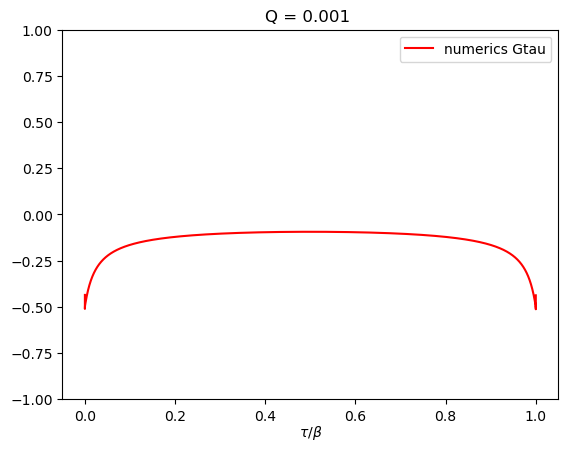

In [5]:
plt.plot(tau/beta, np.real(Gtau), 'r', label = 'numerics Gtau')
#plt.plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
plt.ylim(-1,1)
plt.xlabel(r'$\tau/\beta$',labelpad = 0)
plt.legend()
plt.title('Q = %.3f ' %np.real(Q) )

Text(0.5, 1.0, '$\\mu = $ 0.001 ;  Q = 0.001')

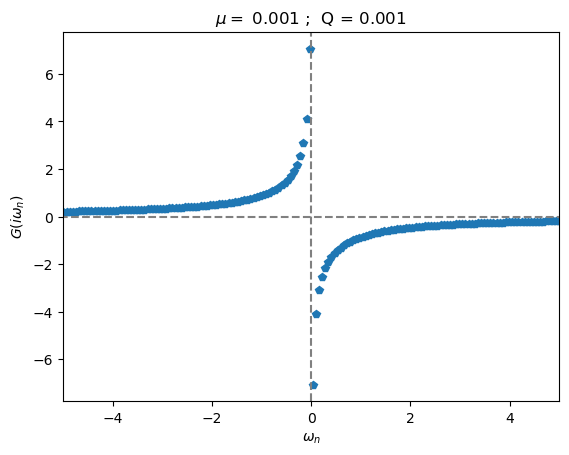

In [6]:
plt.plot(omega,np.imag(Gomega),'p')
plt.plot(omega,np.zeros_like(omega), color = 'gray', linestyle = '--')
plt.axvline(0,color='gray',linestyle = '--')
plt.xlim(-5,5)
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$G(i\omega_n)$')
plt.title(r'$\mu = $ ' + str(mu) + ' ;  Q = %.3f' %np.real(Q))

<Figure size 600x600 with 0 Axes>

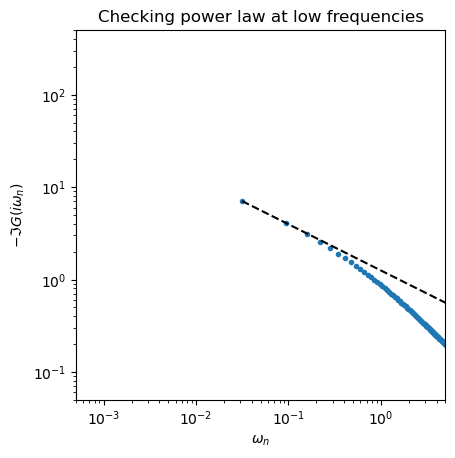

<Figure size 600x600 with 0 Axes>

In [7]:
plt.loglog(omega[Nbig//2:],-np.imag(Gomega[Nbig//2:]),'.')
fudfac = -np.imag(Gomega[Nbig//2])/omega[Nbig//2]**(-0.5)
plt.loglog(omega[Nbig//2:],fudfac* (omega[Nbig//2:]**(-0.5)),'k--')
plt.title('Checking power law at low frequencies')
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$-\Im{G(i\omega_n)}$')
plt.xlim(5e-4,5e0)
plt.ylim(5e-2,5e2)
plt.gca().set_aspect('equal')
plt.figure(figsize=(6,6))

## Checking the anderson algorithm for a simple case of a function of a single variable

In [8]:
sol = optimize.fsolve(lambda x : x**2 - 9, [2,])
sol

array([3.])

In [9]:
vec = np.array([1+2j,2+3j,3-1j,4])
norm(vec), rmsnorm(vec)

(6.6332495807108, 3.3166247903554)

In [10]:
def decorator(f):
    def inner(*args,**kwargs):
        return f(*args, **kwargs, y=5)
    return inner

@decorator
def add(x,y):
    return x+y

add(2)


7